<a href="https://colab.research.google.com/github/AjayKadoula/Mtech_Lab_1/blob/main/decision_tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Decision Tree**
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

# **Data set**
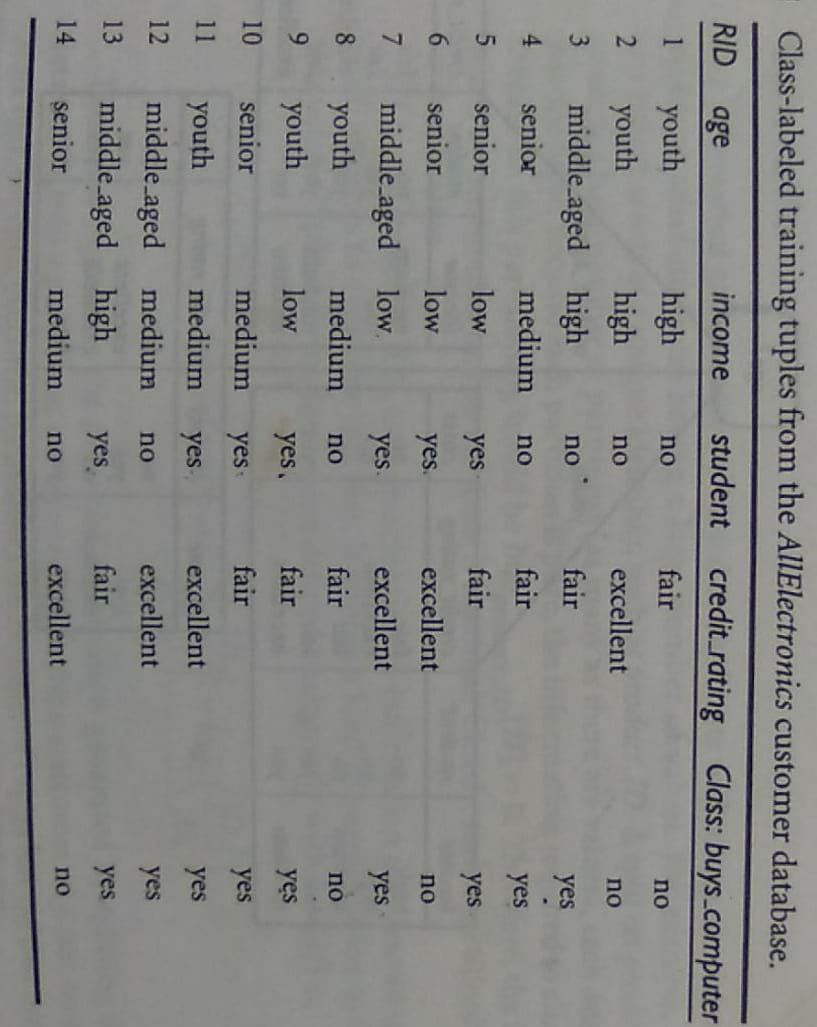

# **The complete process can be better understood using the below algorithm:**
Step-1: Begin the tree with the root node, says S, which contains the complete dataset.

Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).

Step-3: Divide the S into subsets that contains possible values for the best attributes.

Step-4: Generate the decision tree node, which contains the best attribute.

Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.

In [9]:
import pandas as pd
import numpy as np
import pydotplus
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz



In [10]:
dataset = pd.read_csv("loandata.csv")
dataset

,RID,age,income,student,credit_rating,buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_aged,low,yes,excellent,no
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


In [13]:
x = dataset.iloc[:,:-1]
x



,RID,age,income,student,credit_rating
0,1,youth,high,no,fair
1,2,youth,high,no,excellent
2,3,middle_aged,high,no,fair
3,4,senior,medium,no,fair
4,5,senior,low,yes,fair
5,6,senior,low,yes,excellent
6,7,middle_aged,low,yes,excellent
7,8,youth,medium,no,fair
8,9,youth,low,yes,fair
9,10,senior,medium,yes,fair


In [15]:
y=dataset.iloc[:,5]
LabelEncoder_x = LabelEncoder()
x = x.apply(LabelEncoder().fit_transform)
x

,RID,age,income,student,credit_rating
0,0,2,0,0,1
1,1,2,0,0,0
2,2,0,0,0,1
3,3,1,2,0,1
4,4,1,1,1,1
5,5,1,1,1,0
6,6,0,1,1,0
7,7,2,2,0,1
8,8,2,1,1,1
9,9,1,2,1,1


In [21]:
regressor = DecisionTreeClassifier()
regressor.fit(x.iloc[:,1:5],y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
x_in = np.array([1,1,0,0])
y_pred = regressor.predict([x_in])
y_pred

array(['no'], dtype=object)

In [28]:
dot_data = StringIO()
export_graphviz(regressor,out_file=dot_data,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
pc = graph.write_png('dc_tree.png')
pc

True

# **Output Image:**

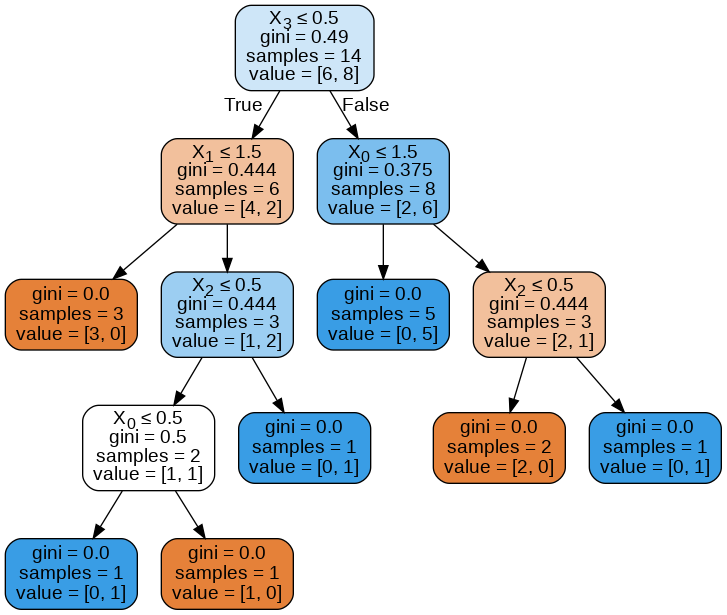

In [31]:
Image(filename='dc_tree.png')